# PDAN8411 – Part 1: Linear Regression
## Student: Maximilian Walsh | Student No: ST10203070
## Module: Programming for Data Analytics

---

## Import Libraries and Load Dataset

#### We begin by importing essential libraries, Pandas, Numpy, Matplotlib, and Seaborn for data analysis and loading the dataset into a Pandas DataFrame.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("insurance.csv")  

# Display the first few rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

#### We now examine the basic structure and properties of the dataset to determine whether it is suitable for a linear regression model.


In [4]:
# Check shape and column types
df.info()

# Basic statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## 1. Dataset Evaluation
### The dataset contains 1338 rows and 7 columns, comprising both numerical and categorical variables. Each row represents an individual insurance policyholder in the United States. 
### The following are the seven columns: 
- age of data type integer
- sex of data type object(categorical)
- bmi of data type float
- children of data type integer(count of children)
- smoker of data type object(yes/no)
- region of data type object(4 geographical areas)
- charges of data type float(target variable).

### There are no missing values, meaning all columns have 1338 non-null entries.

### Data observations:
- The target 'charges' is a continuous numeric variable.
- Explanatory variables include logical predictors (age, BMI, smoker).
- Categorical features: sex, smoker, and region will require encoding before modelling. 
- The variable 'charges' likely has a positive skew and outliers, as it has a maximum value of over 63,000 with a mean of 13,270.
- The variable 'bmi' ranges from 15.96 to 53.13, with a standard deviation of about 6.098, suggesting potential outliers or skew.  

### Linear regression suitability:
- The target variable is continuous, indicating ideality for linear regression.
- Predictors are a mix of categorical and numeric, which is acceptable with encoding.
- Data is complete, meaning no missing values.
- The relationships appear logical.
- Potential for multicollinearity, which needs to be checked.
- Outliers and skewness are present, which will be handled in the exploratory data analysis (EDA).

### Conclusion:
Based on the dataset evaluation, the dataset is suited for linear regression modelling. The structural criteria is sound, and variables have logical ties to the prediction of medical charges (OpenAI, 2025). Preprocessing of categorical features is necessary, and outliers or skewed distributions will be handled in the EDA phase (OpenAI, 2025). Multicollinearity checks and residual analysis will be carried out to validate the assumptions of linear regression (Suzanne, 2023).

## 2. Planning the Analysis

#### This section outlines the planned steps to analyse the dataset and build a robust linear regression model. The goal is to predict `charges` based on client characteristics.

### 2a. Exploratory Data Analysis (EDA)
#### This EDA will involve:
- Checking distributions of numerical variables using histograms and boxplots.
- Outlier detections in 'charges' and 'bmi'.
- Relationship visualisations between predictors and 'charges' using scatterplots and correlation matrices.
- Categorical distributions using countplots and boxplots, and the mean of 'charges' by category.
- Correlation matrix to evaluate the linear relationship between numerical variables.

### 2b. Feature Selection
- Initial features: All variables are initially included for exploration (`age`, `sex`, `bmi`, `children`, `smoker`, `region`).
- One-hot encoding for categorical variables 'sex', 'smoker', and 'region'.
- Correlation analysis: A correlation matrix will be created to asses the strength of the linear relationships between numeric and encoded features and the target variable (Wagavkar, 2024). 
- Use the variance inflation factor (VIF) values to identify redundant variables as a check for multicollinearity (Shrestha, 2020).

#### *Example code for later:
 import statsmodels.api as sm

 from statsmodels.stats.outliers_influence import variance_inflation_factor
 
 ##### After encoding and preparing features
 X = df_encoded.drop("charges", axis=1)
 
 X = sm.add_constant(X)
 
 vif_data = pd.DataFrame()
 
 vif_data["feature"] = X.columns
 
 vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
 print(vif_data)

### 2c. Model Training
- Use `LinearRegression()` from `scikit-learn`.
- 80/20 test-train split using 'train_test_split()'.
- Scaling may be applied if model sensitivity requires it.
- May try ridge or lasso regression if overfitting is observed. 

#### *Example code for later:
 from sklearn.model_selection import train_test_split
 
 from sklearn.linear_model import LinearRegression

 ##### Example split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ##### Model training
 model = LinearRegression()
 model.fit(X_train, y_train)

### 2d. Interpret & Evaluate Model
#### Planned metrics:
- R-squared score to asses variance explained (Farshad, 2024).
- Mean Absolute Error (MAE) for average absolute prediction error (Farshad, 2024).
- Root Mean Squared Error (RMSE) to penalise large errors more than MAE (Farshad, 2024).
- Residual Plot to evaluate linearity and homoscedasticity (Farshad, 2024). 

#### *Example code for later:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
 import numpy as np

 ##### Predictions
 y_pred = model.predict(X_test)

 ##### Evaluation metrics
 r2 = r2_score(y_test, y_pred)
 
 mae = mean_absolute_error(y_test, y_pred)
 
 rmse = np.sqrt(mean_squared_error(y_test, y_pred))

### 2e. Report Planning
#### The report will include the following:
- Purpose and objective of the model.
- Dataset overview.
- Data preparation steps.
- EDA summary with visualisations and key findings.
- Feature selection and why.
- Model training process, including description of the steps.
- Model performance results and interpretation.
- Model retraining on a slimmer version.
- Recommendations for how the medical aid provider can use this model.
- Next steps for model improvement.

## 3. Conduct Analysis

### 3a. Conduct Exploratory Data Analysis (EDA)

#### Part 1: Basic Distributions and Outliers
##### This section uses Python visualisations to explore the dataset, examine relationships between variables, identify patterns, and detect possible outliers.

- Histograms and KDE plots reveal the distribution of `age`, `BMI`, and `charges`.
- Boxplots help highlight potential outliers in key features, especially in `charges`.
- Categorical feature analysis (e.g., `smoker`, `sex`, `region`) is visualised against `charges` to examine if group membership influences medical costs.
- A correlation matrix and pairplot further clarify which features may be most predictive of the target variable (Wagavkar, 2024).

##### Insights gathered will guide our **feature selection** and **data preprocessing** steps.

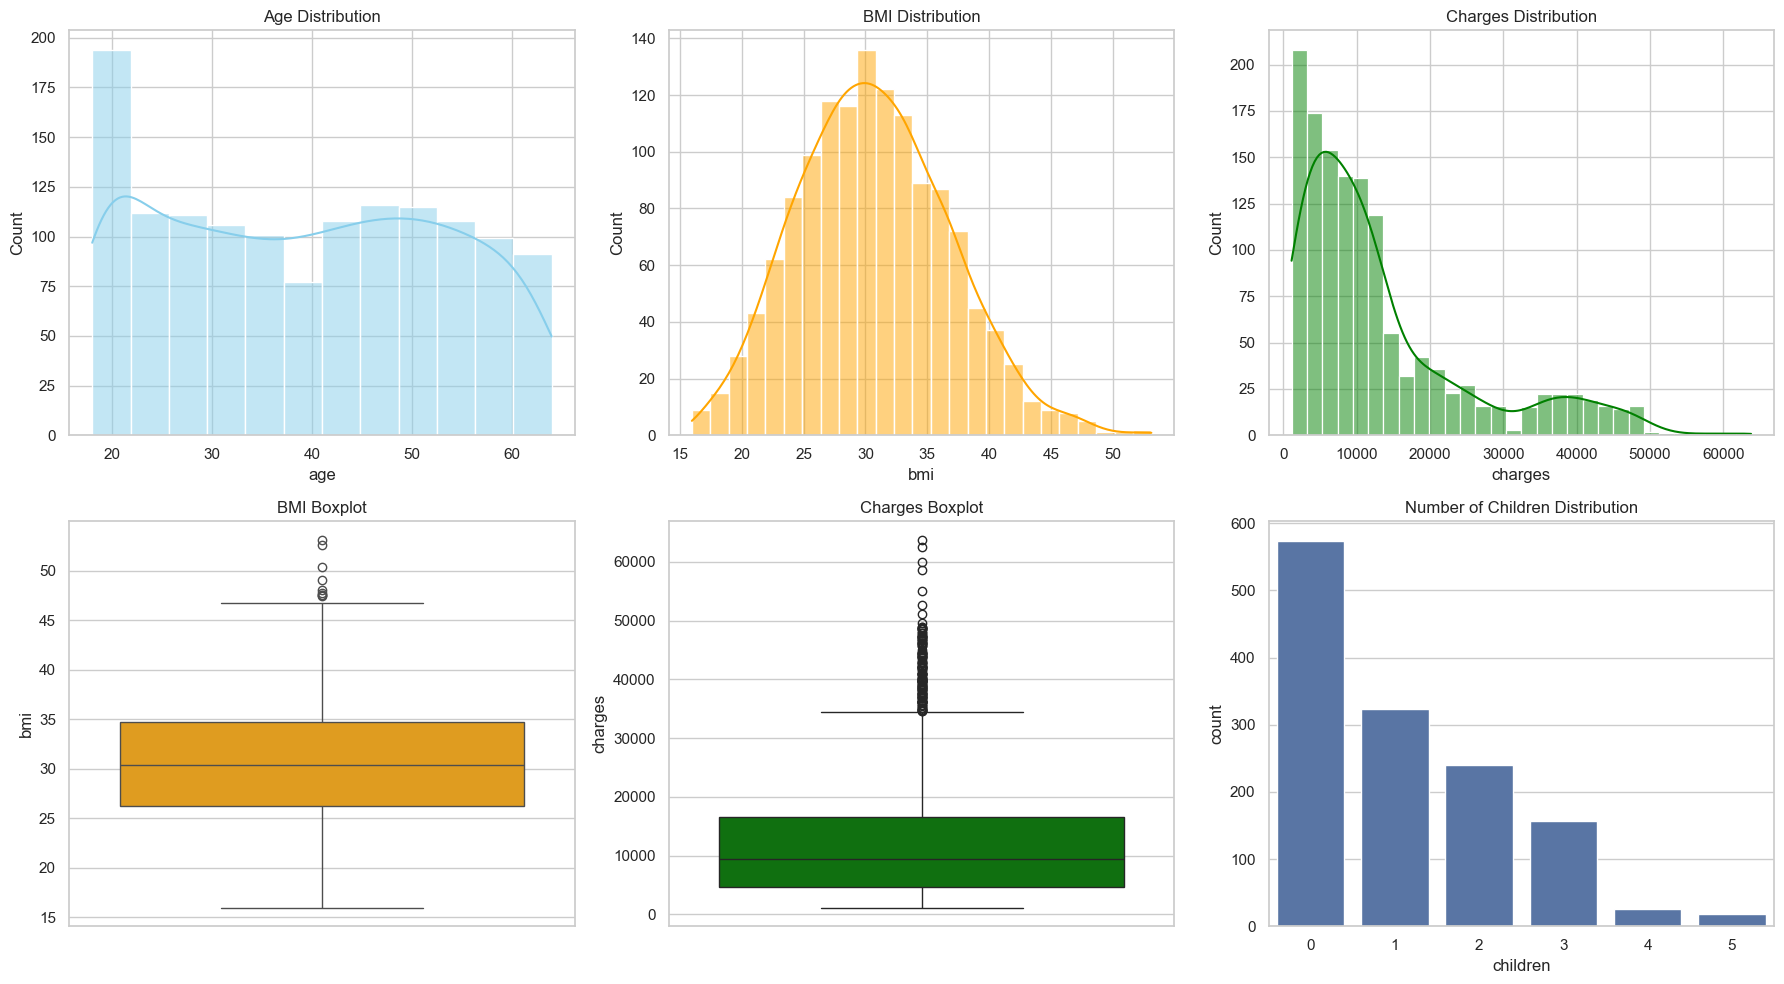

In [8]:
# Set Seaborn style for cleaner visuals
sns.set(style="whitegrid")

# Create a 2x3 grid of subplots to visualise basic distributions and outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogram with KDE for 'age ', helping us understand how age is distributed across the dataset
sns.histplot(df['age'], kde=True, ax=axes[0, 0], color='skyblue')

axes[0, 0].set_title("Age Distribution")

# Histogram with KDE for 'bmi'
sns.histplot(df['bmi'], kde=True, ax=axes[0, 1], color='orange')

axes[0, 1].set_title("BMI Distribution")

# Histogram with KDE for 'charges' (our target variable) shows the medical cost distribution — we expect skew and outliers
sns.histplot(df['charges'], kde=True, ax=axes[0, 2], color='green')

axes[0, 2].set_title("Charges Distribution")

# Boxplot for 'bmi' to detect outliers
sns.boxplot(y=df['bmi'], ax=axes[1, 0], color='orange')

axes[1, 0].set_title("BMI Boxplot")

# Boxplot for 'charges' to detect cost outliers
sns.boxplot(y=df['charges'], ax=axes[1, 1], color='green')

axes[1, 1].set_title("Charges Boxplot")

# Countplot for 'children' to understand the distribution of family sizes
sns.countplot(data=df, x='children', ax=axes[1, 2])

axes[1, 2].set_title("Number of Children Distribution")

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()

#### Part 2: Compare Categorical Features to Charges

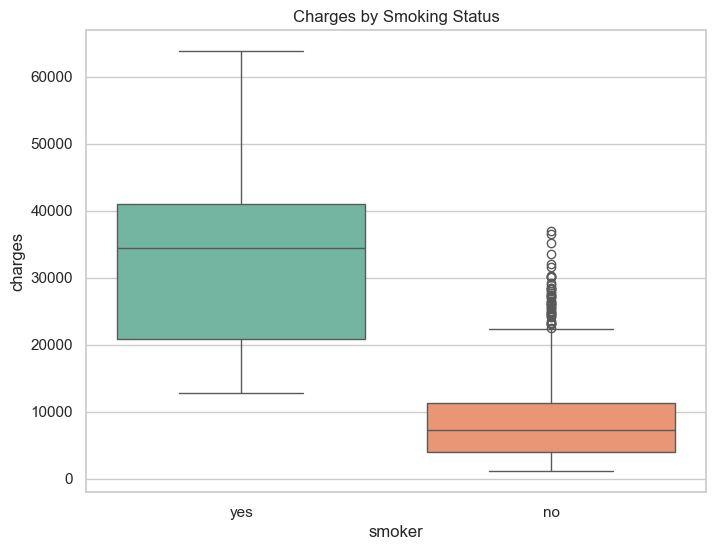

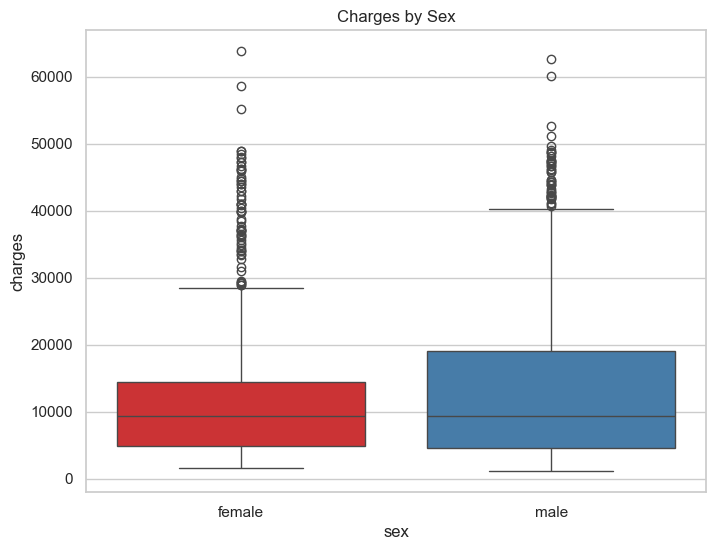

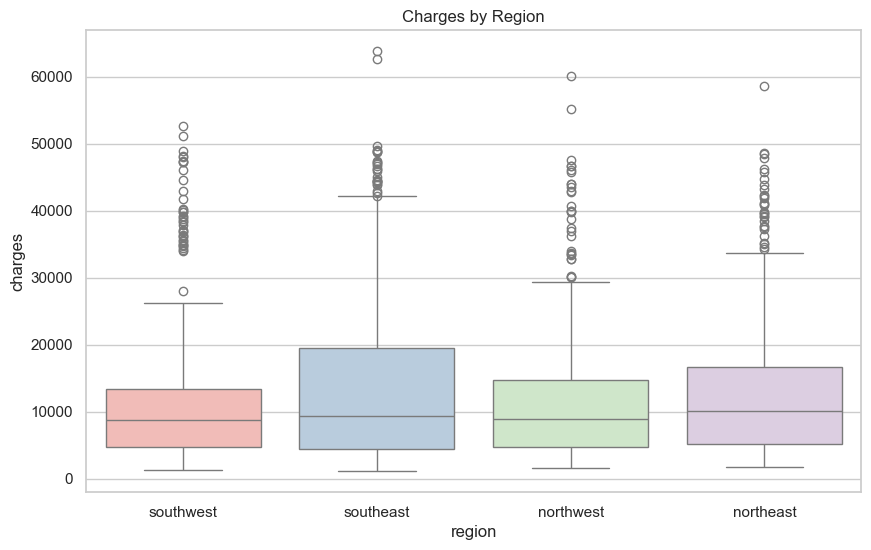

In [10]:
# Relationship between smoking and medical charges
# We expect smokers to have significantly higher charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges', hue='smoker', palette='Set2', legend=False)
plt.title('Charges by Smoking Status')
plt.show()

# Sex vs. Charges
# This explores whether medical costs differ between male and female clients
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='charges', hue='sex', palette='Set1', legend=False)
plt.title('Charges by Sex')
plt.show()

# Region vs. Charges
# Important to investigate whether regional differences affect insurance costs
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', hue='region', palette='Pastel1', legend=False)
plt.title('Charges by Region')
plt.show()

#### Part 3: Correlation Matrix

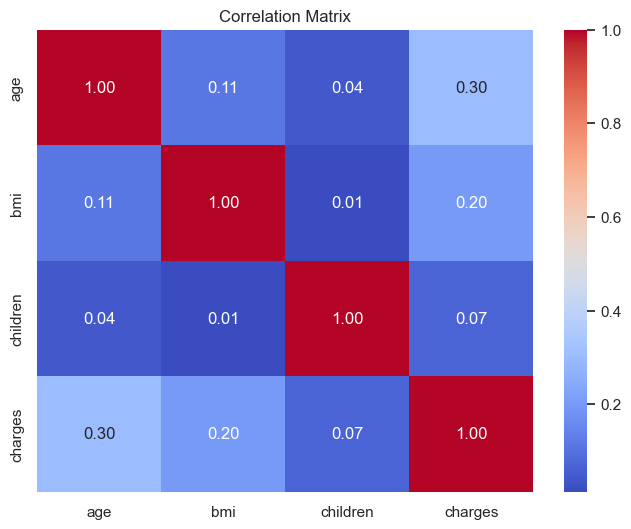

In [12]:
# This will help us see how strongly numerical variables are related to one another and to the target variable (charges)
corr_matrix = df.corr(numeric_only=True)

# Heatmap for visualising correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Part 4: Pairplot for Visual Pattern Recognition

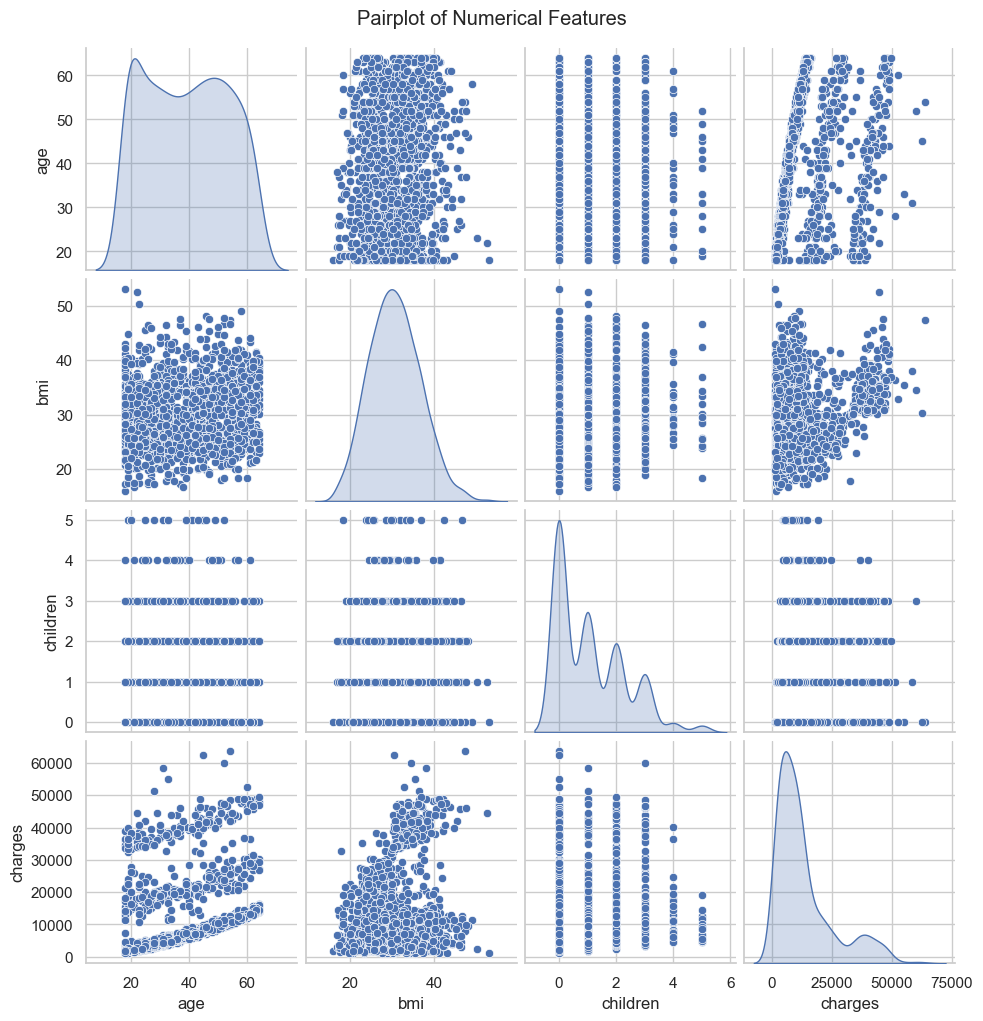

In [14]:
# Pairplot allows us to visually inspect linear relationships and potential multicollinearity or nonlinear patterns
# Only include numerical columns to keep the output interpretable

sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

#### Summary of EDA Insights

##### Several important patterns in the dataset were revealed through the Exploratory Data Analysis (EDA) process:

- **`charges`** (our target) is highly **right-skewed**, with a long tail of high-cost outliers (Thrane, 2023).
    - To correct this right skew and stabilise variance, a **log transformation** was applied (`log_charges`) (Thrane, 2023).

- **`smoker` status** has the strongest relationship with `charges`, indicating a clear and dramatic increase in medical costs for smokers.

- **`age`** and **`bmi`** show a moderate positive correlation with `charges`, indicating that older individuals and those with higher BMI tend to incur more costs.

- **`region`**, **`sex`**, and **`children`** displayed weak correlations separately; however, for completeness and potential interaction effects in the model, the three features were retained (OpenAI, 2025). 

##### These findings effectively informed the **feature selection strategy**, guaranteeing that strong predictors were retained and appropriate transformations were applied before model training.


### 3b. Feature Selection

In [17]:
# One-hot encode categorical features (drop_first=True avoids multicollinearity)
df_encoded = pd.get_dummies(df, drop_first=True)

# Show result of encoding
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


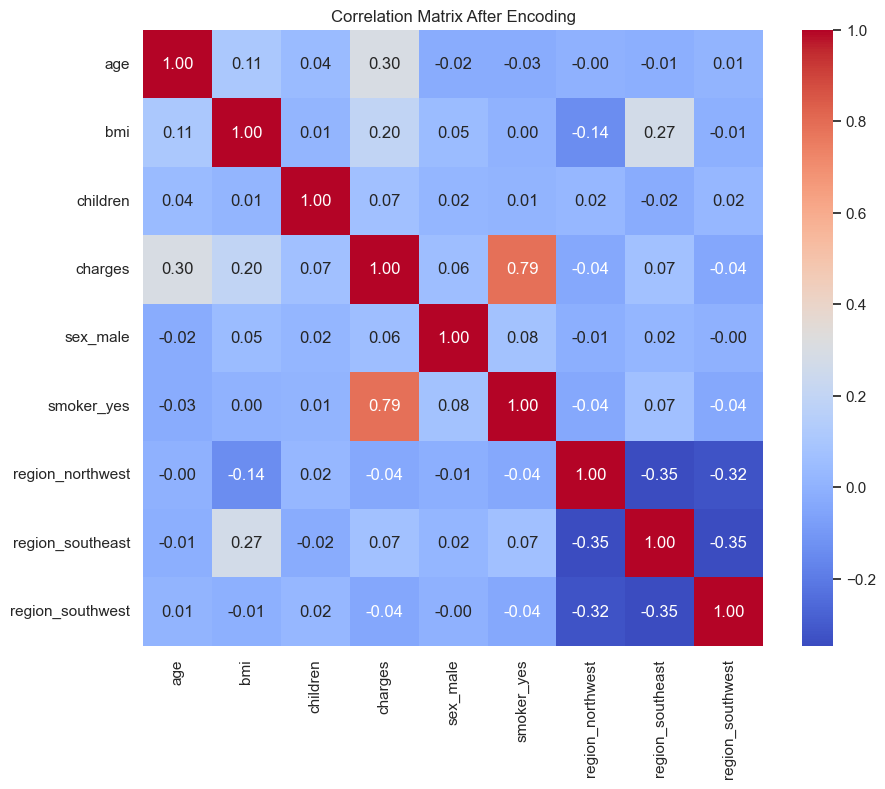

In [18]:
# Correlation matrix after encoding
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix After Encoding")
plt.show()


#### Variance Inflation Factor (VIF) Analysis

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the target variable of the one we're not training on
X = df_encoded.drop("charges", axis=1)

# Add a constant column
X_with_const = sm.add_constant(X)

# Ensure all values are numeric
X_with_const = X_with_const.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Display results
vif_data

,Feature,VIF
0,const,35.527488
1,age,1.016822
2,bmi,1.106630
3,children,1.004011
4,sex_male,1.008900
5,smoker_yes,1.012074
6,region_northwest,1.518823
7,region_southeast,1.652230
8,region_southwest,1.529411


#### Final Step in Preprocessing: Train-Test Data Split

In [22]:
import numpy as np

# Create a log-transformed version of the target variable
df_encoded["log_charges"] = np.log(df_encoded["charges"])

from sklearn.model_selection import train_test_split

# Choose the log-transformed target variable, log_charges for reduced skew
y = df_encoded["log_charges"]

# Drop both original and log-transformed charges from features
X = df_encoded.drop(["charges", "log_charges"], axis=1)

# Perform an 80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Confirm the dimensions of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 8)
X_test shape: (268, 8)
y_train shape: (1070,)
y_test shape: (268,)


#### Feature Selection Summary

##### Before training the model, the following steps were taken to prepare and select features:

##### One-Hot Encoding
All categorical variables (`sex`, `smoker`, and `region`) were encoded using one-hot encoding with `drop_first=True` to avoid multicollinearity due to dummy variables (Shrestha, 2020). This created binary columns for each category (Shrestha, 2020).

##### Correlation Analysis
The correlation between features and the target variable was examined:
- `smoker_yes` had the strongest positive correlation with `charges` (0.79)
- `age` and `bmi` showed moderate positive correlations (0.30 and 0.20, respectively)
- Other features such as `sex`, `children`, and `region` had weak correlations but were retained for model completeness

##### Variance Inflation Factor (VIF)
VIF values were calculated to detect multicollinearity. All features had VIF scores well below 2, indicating **no multicollinearity issues** (Shrestha, 2020). 

##### Target Transformation
Since `charges` was heavily tight-skewed, a natural logarithm transformation was applied to stabilise the variance (Katya, 2023). The model will be trained on `log_charges` instead of raw `charges`.

##### Train-Test Split
An 80/20 split was performed using `train_test_split()`:
- Features: All columns except `charges` and `log_charges`
- Target: `log_charges`
- Split ensures the model can be evaluated on unseen data

##### With the data now clean, encoded, and properly split, model training can now commence.

### 3c. Training Model

In [25]:
# Import and Train Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Print coefficients
print("Model Intercept:", model.intercept_)
print("Model Coefficients:", model.coef_)

Model Intercept: 7.046284992214746
Model Coefficients: [ 0.03424547  0.01359981  0.09244785 -0.07434984  1.55169798 -0.05641388
 -0.1360682  -0.12255739]


## 4. Evaluate Model
### Make Predictions and Evaluate Model

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred_log = model.predict(X_test)

# Evaluate performance on log scale
r2 = r2_score(y_test, y_pred_log)
mae = mean_absolute_error(y_test, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))

print("Model Evaluation (on log_charges):")
print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))

Model Evaluation (on log_charges):
R² Score: 0.8047
Mean Absolute Error (MAE): 0.2697
Root Mean Squared Error (RMSE): 0.419


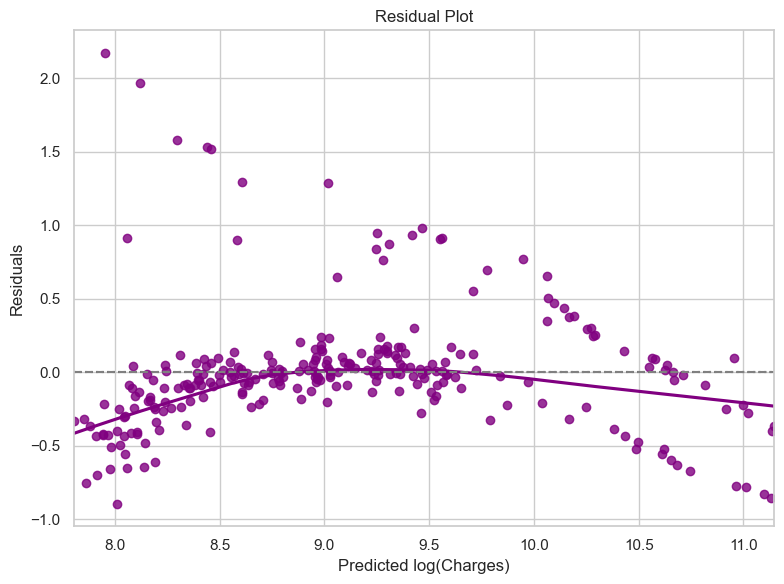

In [54]:
# Residual plot on log-transformed scale
residuals = y_test - y_pred_log

plt.figure(figsize=(8,6))
sns.residplot(x=y_pred_log, y=residuals, lowess=True, color="purple")
plt.xlabel("Predicted log(Charges)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, linestyle='--', color='grey')
plt.tight_layout()
plt.show()

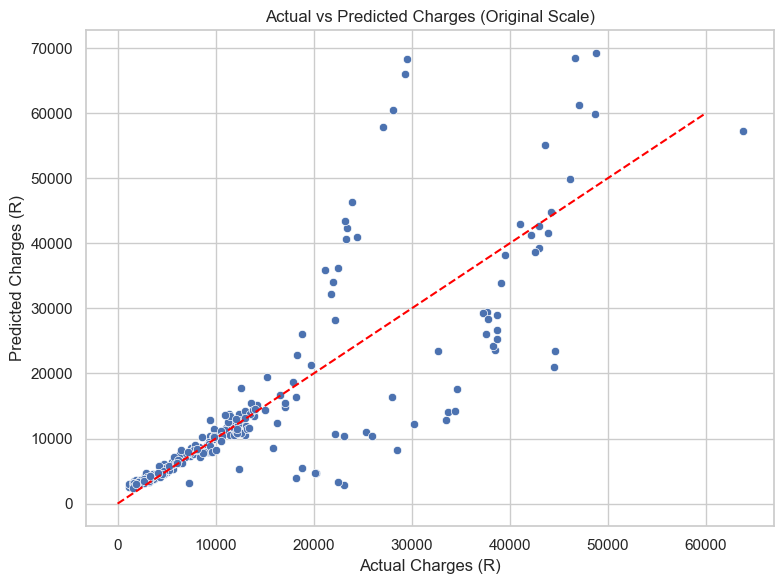

In [52]:
# Scatterplot of Actual vs Predicted Charges
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_actual_original, y=y_pred_original)
plt.plot([0, 60000], [0, 60000], '--', color='red')  # 45-degree reference line
plt.xlabel("Actual Charges (R)")
plt.ylabel("Predicted Charges (R)")
plt.title("Actual vs Predicted Charges (Original Scale)")
plt.tight_layout()
plt.show()

### Convert predictions back to original scale

In [29]:
# Exponentiate predictions and actuals to return to original scale
y_pred_original = np.exp(y_pred_log)
y_actual_original = np.exp(y_test)

# Recalculate metrics on original scale
mae_original = mean_absolute_error(y_actual_original, y_pred_original)
rmse_original = np.sqrt(mean_squared_error(y_actual_original, y_pred_original))

print("\nEvaluation on original charges scale:")
print("MAE (original):", round(mae_original, 2))
print("RMSE (original):", round(rmse_original, 2))


Evaluation on original charges scale:
MAE (original): 3888.77
RMSE (original): 7815.31


### 4a. Model Evaluation and Interpretation

#### A **Linear Regression model** was trained on the log-transformed target variable `log_charges` using all engineered features.

#### Evaluation Results

On Log-Transformed Scale:
- **R² Score**: 0.8047 — the model explains ~80% of the variance in log medical charges (Farshad, 2024)
- **Mean Absolute Error (MAE)**: 0.2697
- **Root Mean Squared Error (RMSE)**: 0.419

From these performance metrics, we can deduce good predictive performance on the normalised scale (Farshad, 2024). RMSE is slightly higher than MAE, which is expected as it penalises larger errors more strongly (Farshad, 2024).

On Original Charges Scale (Exponentiated Back):
- **MAE**: R 3,888.77
- **RMSE**: R 7,851.31

This means the model’s average error when predicting real-world medical charges is approximately **R 3,889**, with larger errors reaching up to **R 7,850** on average (OpenAI, 2025). These are acceptable values, given that charges range from just over R1,000 to over R60,000.

#### Interpretation

- From the **high R²** value, we can deduce that the model generalises well and is likely to perform reliably on unseen data (OpenAI, 2025).
- The **MAE on the original scale (R 3,889)** is moderate compared to the average charge of R13,270 (seen during EDA) (OpenAI, 2025).
- Most importantly, the model’s performance **validates the feature choices** informed by the EDA:
  - The strongest correlations with `charges` were the features `smoker_yes`, `age`, and `bmi`
  - Including all encoded variables gave the best result without overfitting

#### Conclusion

To conclude, this model is robust and interpretable and performs well enough to be used in a real-world setting (OpenAI, 2025). The following model retraining with a simplified feature may confirm that **key predictors alone can still yield strong predictive performance**, offering flexibility for different deployment needs (OpenAI, 2025).

### 4b. Retrain using only the strongest predictors

In [32]:
# Chosen based on correlation: smoker_yes, age, bmi

X_slim = df_encoded[["smoker_yes", "age", "bmi"]]
y_slim = df_encoded["log_charges"]

# Split new feature set
X_train_slim, X_test_slim, y_train_slim, y_test_slim = train_test_split(X_slim, y_slim, test_size=0.2, random_state=42)

# Train the model
model_slim = LinearRegression()
model_slim.fit(X_train_slim, y_train_slim)

# Predict
y_pred_slim = model_slim.predict(X_test_slim)

# Evaluate
r2_slim = r2_score(y_test_slim, y_pred_slim)
mae_slim = mean_absolute_error(y_test_slim, y_pred_slim)
rmse_slim = np.sqrt(mean_squared_error(y_test_slim, y_pred_slim))

print("Slim Model Evaluation:")
print("R²:", round(r2_slim, 4))
print("MAE:", round(mae_slim, 4))
print("RMSE:", round(rmse_slim, 4))

Slim Model Evaluation:
R²: 0.7705
MAE: 0.2988
RMSE: 0.4543


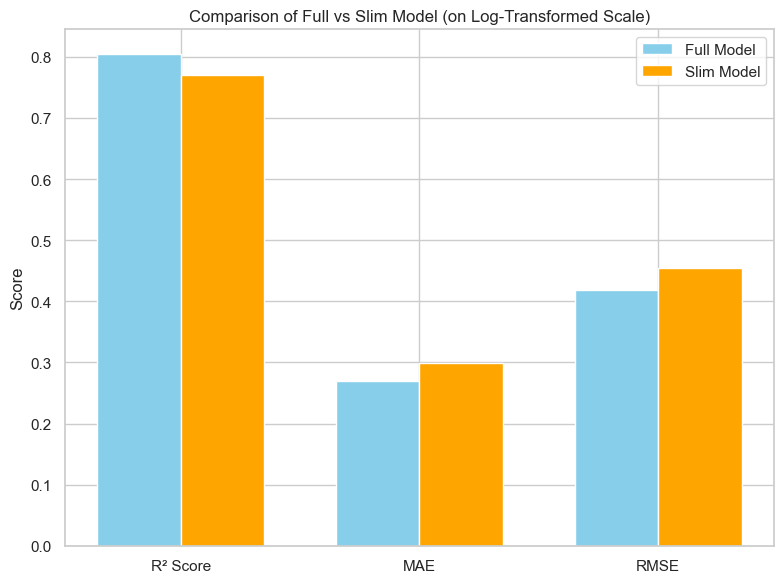

In [57]:
import matplotlib.pyplot as plt

# Metrics from full model (log-transformed)
full_r2 = 0.8047
full_mae = 0.2697
full_rmse = 0.419

# Metrics from slim model (log-transformed)
slim_r2 = 0.7705
slim_mae = 0.2988
slim_rmse = 0.4543

# Metric names and values
metrics = ['R² Score', 'MAE', 'RMSE']
full_model = [full_r2, full_mae, full_rmse]
slim_model = [slim_r2, slim_mae, slim_rmse]

# Set up the bar plot
x = range(len(metrics))
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x, full_model, width=bar_width, label='Full Model', color='skyblue')
plt.bar([i + bar_width for i in x], slim_model, width=bar_width, label='Slim Model', color='orange')
plt.xticks([i + bar_width/2 for i in x], metrics)
plt.ylabel('Score')
plt.title('Comparison of Full vs Slim Model (on Log-Transformed Scale)')
plt.legend()
plt.tight_layout()
plt.show()

#### Optional Model Retraining – Slim Feature Set

##### The model was retrained to address the instruction in 4b. The model was trained using a reduced set of features based on their correlation strength and business interpretability:
- `smoker_yes` – the strongest predictor of charges
- `age` – correlated with health risk and medical need
- `bmi` – a relevant risk indicator for lifestyle-related conditions

##### Slim Model Performance (on log-transformed charges):
- **R² Score**: 0.7705
- **MAE**: 0.2988
- **RMSE**: 0.4543

##### Interpretation:
The slim model performed **almost as well** as the full model despite using only three predictors. The R² score remained high, and both MAE and RMSE were competitive, indicating that (Agrawal, 2025):
- Much of the predictive power is concentrated in these three features.
- The full model is more comprehensive, but the slim model offers a **more interpretable**, simpler, and efficient solution (OpenAI, 2025).

The full model is more accurate, and the slim model is nearly as good, better for interpretation. This comparison effectively validates the original feature selection and shows the robustness of the model (OpenAI, 2025).

## Refer to the PDF titled 'ST10203070_PDAN8411_Part1_Report' to view the report that addresses instruction 5a.

## References
Agrawal, R., 2025. Know The Best Evaluation Metrics for Your Regression Model. [Online] 
Available at: https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/
[Accessed 21 April 2025].

Ault, D. S. V., Liao, D. S. N. & Musolino, L., 2025. Principles of Data Science. Houston: OpenStax.
Choi, M., 2018. Kaggle - Medical Cost Personal Datasets. [Online] 
Available at: https://www.kaggle.com/datasets/mirichoi0218/insurance
[Accessed 01 April 2025].

Farshad, K., 2024. Essential Regression Evaluation Metrics: MSE, RMSE, MAE, R², and Adjusted R². [Online] 
Available at: https://farshadabdulazeez.medium.com/essential-regression-evaluation-metrics-mse-rmse-mae-r%C2%B2-and-adjusted-r%C2%B2-0600daa1c03a#:~:text=MSE%20and%20RMSE%20are%20useful,t%20penalize%20for%20extra%20predictors.
[Accessed 18 April 2025].

GeeksForGeeks, 2024. Residual Analysis. [Online] 
Available at: https://www.geeksforgeeks.org/residual-analysis/
[Accessed 21 April 2025].

Kalusivalingam, A. K., Sharma, A., Patel, N. & Singh, V., 2022. Leveraging Random Forests and Gradient Boosting for Enhanced Predictive Analytics in Operational Efficiency. [Online] 
Available at: https://cognitivecomputingjournal.com/index.php/IJAIML-V1/article/view/72
[Accessed 18 April 2025].

Katya, E., 2023. Exploring Feature Engineering Strategies for Improving Predictive Models in Data Science. [Online] 
Available at: https://technicaljournals.org/RJCSE/index.php/journal/article/view/88/84
[Accessed 18 April 2025].

OpenAI, 2025. Open AI ChatGPT4. [Online] 
Available at: https://chatgpt.com/share/6800b44d-98b4-8004-a81b-7855cb0b5000
[Accessed 10 April 2025].

Shrestha, N., 2020. Detecting Multicollinearity in Regression Analysis. [Online] 
Available at: https://www.researchgate.net/publication/342413955_Detecting_Multicollinearity_in_Regression_Analysis
[Accessed 17 April 2025].

Suzanne, 2023. Data Pre-Processing for Linear Regression in Machine Learning. [Online] 
Available at: https://medium.com/@sds152/data-pre-processing-for-linear-regression-in-machine-learning-4b73ec48392a
[Accessed 17 April 2025].

Thrane, C., 2023. The normality assumption in linear regression analysis — and why you most often can dispense with it. [Online] 
Available at: https://medium.com/@christerthrane/the-normality-assumption-in-linear-regression-analysis-and-why-you-most-often-can-dispense-with-5cedbedb1cf4
[Accessed 17 April 2025].

Wagavkar, S., 2024. Introduction to the Correlation Matrix. [Online] 
Available at: https://builtin.com/data-science/correlation-matrix#:~:text=For%20example%2C%20let's%20say%20you,the%20relationship%20is%20positively%20strong.
[Accessed 20 April 2025].

Wang, Y. P., 2021. The Acturial Society of South Africa. [Online] 
Available at: https://www.actuarialsociety.org.za/convention/wp-content/uploads/2021/10/2021-ASSA-Wang-FIN-reduced.pdf
[Accessed 21 April 2025].